In [2]:
!pip3 install scipy
!pip3 install seaborn
import scipy
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 292 kB 2.2 MB/s eta 0:00:01


In [6]:
# TODO: need to create dataframe.csv file with Ken's script
data = pd.read_csv('dataframe.csv')
data.head()
data2 = data.dropna()
print(data2.head())
#data2.shape

   Unnamed: 0                                   file_name user_name  \
0           0                   data/00/wikihouse/urls.py        00   
1           1  data/0rpc/zerorpc-python/zerorpc/events.py      0rpc   
2           2           data/0xadada/dockdj/app/manage.py   0xadada   
3           3              data/1stvamp/hippybot/setup.py   1stvamp   
4           4           data/2buntu/2buntu-blog/manage.py    2buntu   

        repo_name                                          py_script  comment  \
0       wikihouse  #!/usr/bin/env python\n# -*- coding: utf-8 -*-...        2   
1  zerorpc-python  # -*- coding: utf-8 -*-\n# Open Source Initiat...       24   
2          dockdj  #!/usr/bin/env python\n"""Django's command lin...        1   
3        hippybot  """Installer for hippybot\n"""\n\nimport os\nc...        0   
4     2buntu-blog  #!/usr/bin/env python\nimport os\nimport sys\n...        1   

   comment_len  comment_den  line_count  
0           44     0.017241         116  
1 

/Users/daohuei/miniconda3/envs/py3_8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/daohuei/miniconda3/envs/py3_8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


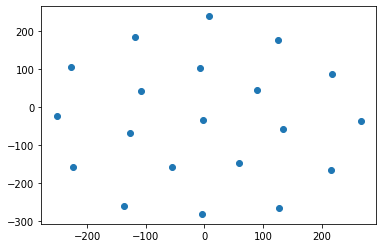

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import make_column_transformer
vect = TfidfVectorizer()
ct = make_column_transformer((vect,'file_name'),(vect,'user_name'),(vect,'py_script'),(vect,'repo_name'),remainder='passthrough')
X = ct.fit_transform(data2)
projection = TSNE().fit_transform(X)
plt.scatter(*projection.T)

     |████████████████████████████████| 5.2 MB 2.4 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached Cython-0.29.29-py2.py3-none-any.whl (985 kB)
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp38-cp38-macosx_11_0_arm64.whl size=630280 sha256=ce59041ba55b9ff6f3a2d420fab96893479814e0d85227aabf38acb2ad0a2be8
  Stored in directory: /Users/daohuei/Library/Caches/pip/wheels/dc/71/35/27e492e5848c7d1b38a6ea86e10261fd7ebaabf7e72c0b47c4
Successfully built hdbscan
20
110000


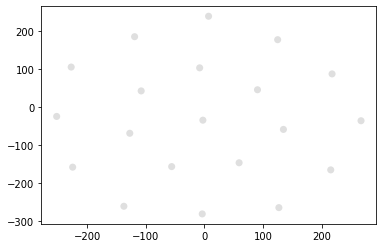

In [9]:
# !pip install hdbscan
from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan
#clustering = DBSCAN(eps=3, min_samples=2)
#clustering.fit_predict(X)


clusterer = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=50, prediction_data=True).fit(X.toarray())
print(len(clusterer.labels_))


color_palette = sns.color_palette('Paired', 110000)
print(len(color_palette))

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)